<a href="https://colab.research.google.com/github/patison5/FAIntelligence/blob/main/%D0%AF%D0%B4%D0%B5%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Справка


price = w1 * area + w2 * bedrooms + bias

w1, w2 and bias to be 1

Error1 = (price - *price*) ^ 2

Total error = error1 + error2 + .. + errorN

Mean Squred Error (MSE) = Total Error / N

w1 = w1 - learning rate * dMSE / dw1 <br>
w2 = w2 - learning rate * dMSE / dw2 <br>
b = b - learning rate * dMSE / db <br>

### Инициализация

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline

### Импортируем данные

In [ ]:
link = "https://raw.githubusercontent.com/patison5/FAIntelligence/main/ML_COURSE/winequality-red.csv"
df = pd.read_csv(link)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Выбираем данные с которыми будем работать

In [ ]:
df = df[['chlorides', 'alcohol', 'quality']]

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('quality', axis='columns'))
scaled_Y = sy.fit_transform(df['quality'].values.reshape(df.shape[0], 1))

df.head(2)

,chlorides,alcohol,quality
0,0.076,9.4,5
1,0.098,9.8,5


### Реализация градиентного спуска

In [ ]:
def gdc(X, y_true, epochs, learning_rate=0.1):
  # Кол-во "фичей" - колонок в Х
  number_of_features = X.shape[1]

  # Кол-во строк с таблице
  total_samples = X.shape[0]

  # Инициализация стартовых значений весов и bias
  w = np.ones(shape=(number_of_features))
  b = 0

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w, scaled_X.T) + b # w1 * feature1 + w2 * feature2 + bias

    # Градиенты
    w_grad = -(2 / total_samples) * (X.T.dot(y_true - y_predicted))
    b_grad = -(2 / total_samples) * np.sum(y_true - y_predicted)

    # Обновление весов
    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    # Средняя квадратичная ошибка
    cost = np.mean(np.square(y_true - y_predicted))
    
    # Сохранение истории
    if i % 10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

In [ ]:
w, b, cost, cost_list, epoch_list = gdc(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],), 5000)
w, b, cost

(array([-0.04692663,  0.46429426]), 0.38861123420862176, 0.020144184772983166)

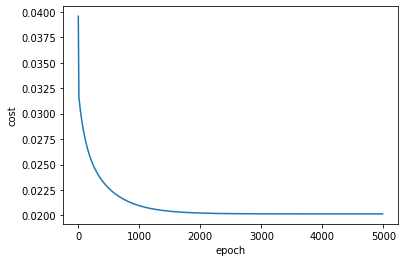

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [ ]:
def predict(feature1, feature2, w, b):
    scaled_X = sx.transform([[feature1, feature2]])[0]
    predicted_quality = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[predicted_quality]])[0][0]

In [ ]:
print("Предсказанное значение: ", int(predict(0.076, 9.4, w, b)))
print("Фактическое значение: 5")

Предсказанное значение:  5
Фактическое значение: 5


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
